In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', 500)

In [4]:
dataset = pd.read_excel('./daily_offers.xlsx')

In [5]:
dataset.shape

(181673, 14)

In [6]:
dataset.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [7]:
dataset.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


<AxesSubplot:>

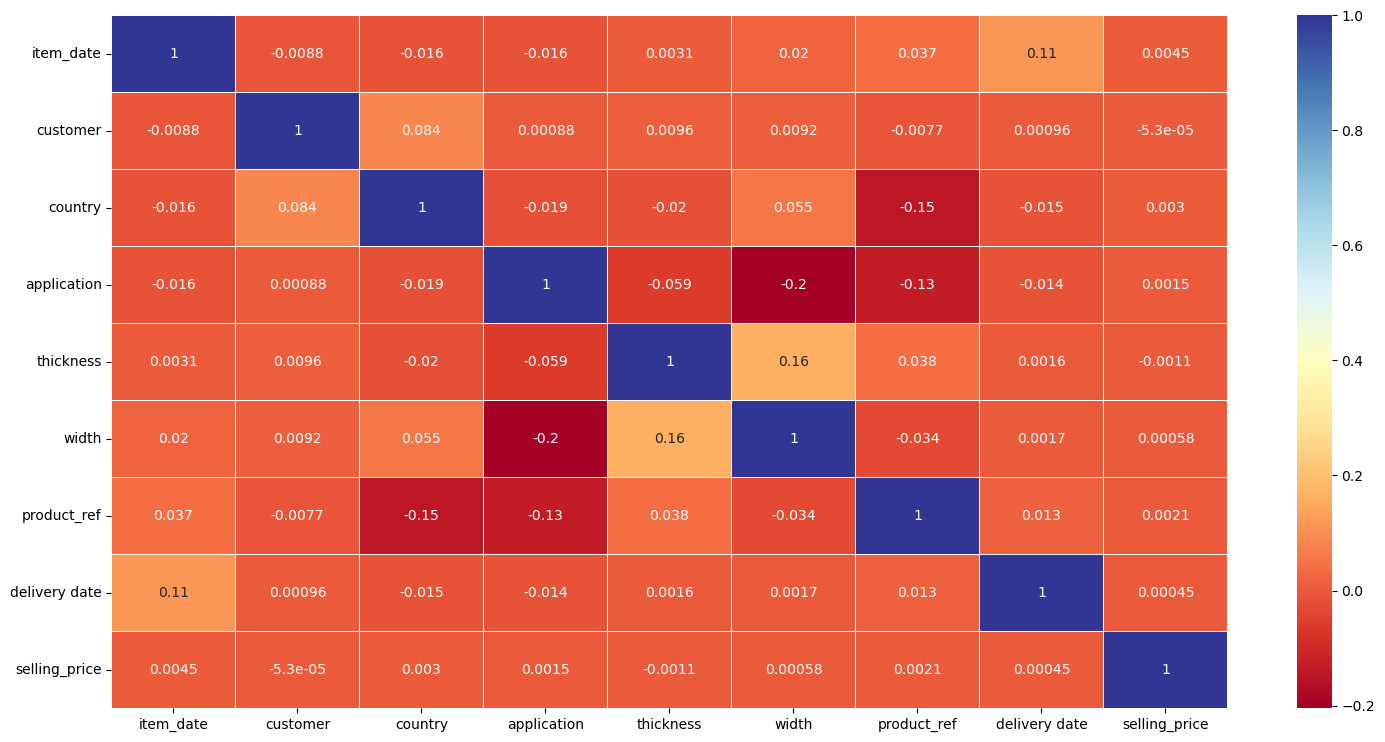

In [907]:
plt.figure(figsize = (18,9))
sns.heatmap(dataset.corr(),annot=True, cmap='RdYlBu',linewidths=0.5)

### The correlation of selling_price with the other features is very low. There is not much we can do with the dataset.. but i'll just give it a go.

In [761]:
df = dataset.copy()

In [762]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [763]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [764]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

# Analyze each columns and Fill Missing Values

#### id

In [765]:
df['id'].describe()

count                                   181671
unique                                  181671
top       EC06F063-9DF0-440C-8764-0B0C05A4F6AE
freq                                         1
Name: id, dtype: object

In [766]:
df['id']

0         EC06F063-9DF0-440C-8764-0B0C05A4F6AE
1         4E5F4B3D-DDDF-499D-AFDE-A3227EC49425
2         E140FF1B-2407-4C02-A0DD-780A093B1158
3         F8D507A0-9C62-4EFE-831E-33E1DA53BB50
4         4E1C4E78-152B-430A-8094-ADD889C9D0AD
                          ...                 
181668    DE633116-D1DF-4846-982E-55EFC3658A76
181669    A48374B1-E6DB-45F2-889A-1F9C27C099EB
181670    91643238-5C7B-4237-9A5F-63AE3D35F320
181671    7AFFD323-01D9-4E15-B80D-7D1B03498FC8
181672    AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC
Name: id, Length: 181673, dtype: object

In [767]:
df[df['id'].isna()]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
26,NaN,20210401.0,15.92799,30271717.0,28.0,To be approved,W,10.0,0.8,1000.0,NaN,611993,20210701.0,1208.0
104566,NaN,20201113.0,27.096376,30197989.0,27.0,Won,W,59.0,2.8,959.0,HRCL_DD 12 2.8X959,640665,20201201.0,551.0


#### 'id' column will be dropped, so no need to fill missing values.

#### item_date

In [768]:
df['item_date'].describe()

count    1.816720e+05
mean     2.020459e+07
std      4.551119e+03
min      1.995000e+07
25%      2.020093e+07
50%      2.020113e+07
75%      2.021020e+07
max      2.021040e+07
Name: item_date, dtype: float64

In [769]:
df['item_date'].value_counts()

20201202.0    2779
20210304.0    2088
20201124.0    1991
20210115.0    1928
20200929.0    1870
              ... 
20201219.0       1
20210313.0       1
20191919.0       1
20200829.0       1
19950000.0       1
Name: item_date, Length: 252, dtype: int64

In [770]:
len(df['item_date'].value_counts())

252

In [771]:
df[df['item_date'].isna()]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
104640,1BA92915-36FC-437A-811C-9DC7BF958EA6,NaN,51.785585,30230331.0,80.0,Lost,S,10.0,0.9,1435.0,NaN,628377,20210101.0,654.0


In [772]:
df[df['item_date'].isna()]['item_date']

104640   NaN
Name: item_date, dtype: float64

In [773]:
df[df['item_date'].isna()]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
104640,1BA92915-36FC-437A-811C-9DC7BF958EA6,NaN,51.785585,30230331.0,80.0,Lost,S,10.0,0.9,1435.0,NaN,628377,20210101.0,654.0


In [774]:
df['item_date'].fillna(method ='ffill', inplace = True)

In [775]:
df['item_date'].isna().sum()

0

In [776]:
df['item_date'].dtypes

dtype('float64')

In [777]:
# replace invalid dates with pd.NaT using a lambda function
df['item_date'] = df['item_date'].apply(lambda x: pd.NaT if not re.match(r'\d{8}', str(x)) else x)

# convert the 'item date' column to datetime format
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')


In [778]:
df['item_date'].fillna( method ='ffill', inplace = True)

In [779]:
# Go to 'quantity tons' code block and rectify non-numeric values

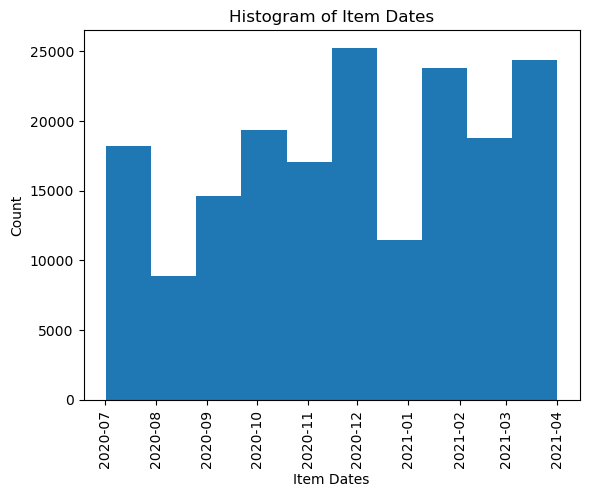

In [780]:
plt.hist(df['item_date'])
plt.xlabel('Item Dates')
plt.ylabel('Count')
plt.title('Histogram of Item Dates')
plt.xticks(rotation=90)
plt.show()

In [781]:
df['item_date'].describe()

/tmp/ipykernel_10556/1144902234.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['item_date'].describe()


count                  181673
unique                    250
top       2020-12-02 00:00:00
freq                     2779
first     2020-07-02 00:00:00
last      2021-04-01 00:00:00
Name: item_date, dtype: object

In [782]:
df['item_date']

0        2021-04-01
1        2021-04-01
2        2021-04-01
3        2021-04-01
4        2021-04-01
            ...    
181668   2020-07-02
181669   2020-07-02
181670   2020-07-02
181671   2020-07-02
181672   2020-07-02
Name: item_date, Length: 181673, dtype: datetime64[ns]

#### quantity tons

In [783]:
df['quantity tons'].describe()

count     181673.000000
unique    181673.000000
top           54.151139
freq           1.000000
Name: quantity tons, dtype: float64

In [784]:
df['quantity tons'].dtype

dtype('O')

In [785]:
# Define a function to check if a value is numeric
def is_numeric(value):
    return bool(re.match(r'^\d+\.?\d*$', str(value)))

In [786]:
df[df['quantity tons'].apply(is_numeric) == False]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
105730,36820BDA-8CDF-49F3-89A2-C50A55B70CEB,2020-11-11,-4,30203192.0,27.0,Won,S,15.0,1.50,1500.0,NaN,1332077137,20210101.0,723.0
131473,D03D83BD-3D05-40FB-A71E-6C33CCD06D97,2020-10-02,-1.476794,30199273.0,27.0,Draft,S,10.0,0.60,1220.0,0000000000000000000000000000000000111598,611993,20210101.0,22.0
173086,3C0A018F-4A85-4D96-A1AA-72BF0F7DC6DD,2020-07-14,e,30157111.0,78.0,Won,W,41.0,0.50,1000.0,NaN,164141591,20200801.0,672.0
173317,9352E84C-B815-465D-9D43-E1FAB375C7B2,2020-07-14,0.00001,30280854.0,38.0,Lost,S,10.0,0.80,1250.0,NaN,628377,20200901.0,548.0
181661,802C8D24-710A-4A96-B3B1-F33F383EC455,2020-07-02,-18,30200854.0,25.0,Won,W,41.0,0.84,1220.0,0000000000000000000000000000000001000776,164141591,20200701.0,590.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0


#### The following 'quantity_tons' values is either negative or non-numeric.
#### So I'm going to set these values to NaN.
#### Then try and fill these values.

In [787]:
df['quantity tons'] = df['quantity tons'].apply(lambda x: float(x) if is_numeric(x) else np.nan)

In [788]:
df['quantity tons'] = df['quantity tons'].astype('float')

In [789]:
df['quantity tons'].dtypes

dtype('float64')

In [790]:
df['quantity tons'] = df['quantity tons'].fillna(df['quantity tons'].median())

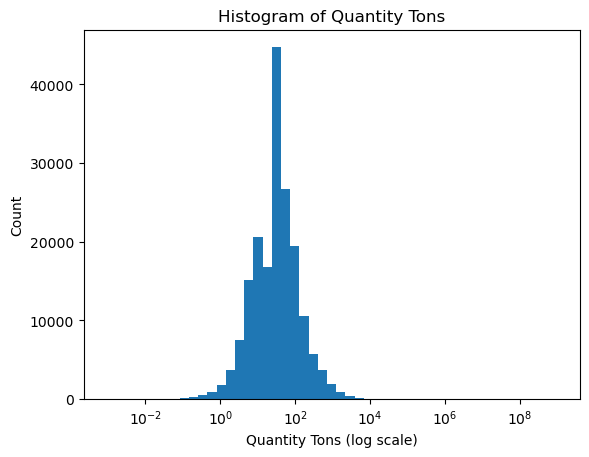

In [791]:
plt.hist(df['quantity tons'], bins=np.logspace(np.log10(df['quantity tons'].min()), np.log10(df['quantity tons'].max()), 50))
plt.xscale('log')
plt.xlabel('Quantity Tons (log scale)')
plt.ylabel('Count')
plt.title('Histogram of Quantity Tons')
plt.show()

#### customer

In [792]:
df['customer'].describe()

count    1.816720e+05
mean     3.051221e+07
std      2.433382e+07
min      1.245800e+04
25%      3.019688e+07
50%      3.020524e+07
75%      3.028042e+07
max      2.147484e+09
Name: customer, dtype: float64

In [793]:
df['customer'].value_counts()

30157111.0    4988
30161088.0    3733
30201846.0    3152
30165529.0    2728
30202938.0    2570
              ... 
30271383.0       1
30356502.0       1
30357481.0       1
30156053.0       1
30271291.0       1
Name: customer, Length: 1169, dtype: int64

In [794]:
if any('.' in str(x) and str(x).split('.')[1] != '0' for x in df['customer']):
    print("There are values in 'my_column' with non-zero decimal values")
else:
    print("All values in 'my_column' have zero decimal values or are not float")

All values in 'my_column' have zero decimal values or are not float


In [795]:
df['customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 181673 entries, 0 to 181672
Series name: customer
Non-Null Count   Dtype  
--------------   -----  
181672 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [796]:
df[df['customer'].isna()]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
104684,6E764168-3F32-4E5D-BD67-4B1D959C75E3,2020-11-12,205.266351,NaN,39.0,Won,W,10.0,3.5,1270.0,NaN,1670798778,20210201.0,650.0


In [797]:
df['customer'] = df['customer'].fillna(df['customer'].median())

In [798]:
df['customer'] = df['customer'].astype(int)

In [799]:
df['customer']

0         30156308
1         30202938
2         30153963
3         30349574
4         30211560
            ...   
181668    30200854
181669    30200854
181670    30200854
181671    30200854
181672    30200854
Name: customer, Length: 181673, dtype: int64

In [800]:
df['customer'].isna().sum()

0

#### country

In [801]:
df['country']

0         28.0
1         25.0
2         30.0
3         32.0
4         28.0
          ... 
181668    25.0
181669    25.0
181670    25.0
181671    25.0
181672    25.0
Name: country, Length: 181673, dtype: float64

In [802]:
df['country'].isna().sum()

28

In [803]:
df['country'].value_counts()

78.0     32084
26.0     27516
25.0     23362
27.0     21511
32.0     18658
28.0     15824
84.0     12776
77.0      9714
30.0      8702
39.0      3731
79.0      2742
38.0      1712
40.0      1683
80.0       819
113.0      714
89.0        92
107.0        5
Name: country, dtype: int64

In [804]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [805]:
df['country'] = df['country'].astype('int')

In [806]:
df['country'].nunique()

17

#### status

In [807]:
df['status']

0         Won
1         Won
2         Won
3         Won
4         Won
         ... 
181668    Won
181669    Won
181670    Won
181671    Won
181672    Won
Name: status, Length: 181673, dtype: object

In [808]:
df['status'].value_counts()

Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [809]:
df['status'].isna().sum()

2

In [810]:
df['status'].fillna(df['status'].mode()[0], inplace=True)

In [811]:
df['status'].value_counts()

Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

#### item type

In [812]:
df['item type']

0          W
1          W
2         WI
3          S
4          W
          ..
181668     W
181669     W
181670     W
181671     W
181672     W
Name: item type, Length: 181673, dtype: object

In [813]:
df['item type'].value_counts()

W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: item type, dtype: int64

In [814]:
df['item type'].isna().sum()

0

#### application

In [815]:
df['application']

0         10.0
1         41.0
2         28.0
3         59.0
4         10.0
          ... 
181668    41.0
181669    41.0
181670    41.0
181671    41.0
181672    41.0
Name: application, Length: 181673, dtype: float64

In [816]:
df['application'].value_counts()

10.0    77544
41.0    46261
15.0    20772
59.0     8927
42.0     5858
56.0     4846
29.0     1937
27.0     1784
26.0     1650
28.0     1591
40.0     1576
25.0     1498
79.0     1422
22.0     1023
20.0      768
66.0      718
3.0       657
38.0      511
58.0      447
4.0       286
39.0      267
65.0      247
67.0      221
68.0      181
99.0      146
19.0      143
69.0      122
5.0       110
70.0      102
2.0        34
Name: application, dtype: int64

(array([78631., 21683.,  9483.,  2354., 52119., 14220.,  1489.,  1524.,
            0.,   146.]),
 array([ 2. , 11.7, 21.4, 31.1, 40.8, 50.5, 60.2, 69.9, 79.6, 89.3, 99. ]),
 <BarContainer object of 10 artists>)

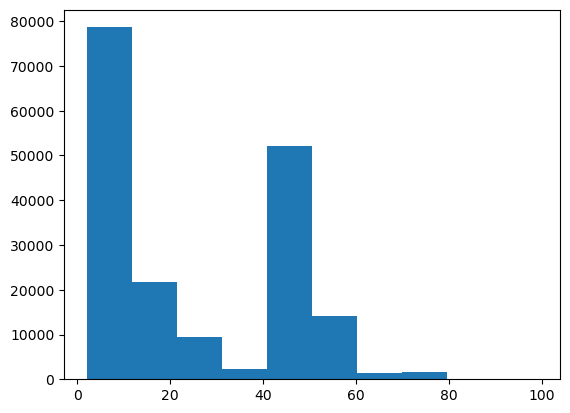

In [817]:
plt.hist(df['application'])

In [818]:
df['application'].isna().sum()

24

In [819]:
df['application'].fillna(method ='ffill', inplace=True)

In [820]:
df['application'].isna().sum()

0

#### thickness

In [821]:
df['thickness']

0         2.00
1         0.80
2         0.38
3         2.30
4         4.00
          ... 
181668    0.96
181669    0.95
181670    0.71
181671    0.85
181672    0.71
Name: thickness, Length: 181673, dtype: float64

In [822]:
df['thickness'].describe()

count    181672.000000
mean          2.564827
std           6.572321
min           0.180000
25%           0.700000
50%           1.500000
75%           3.000000
max        2500.000000
Name: thickness, dtype: float64

In [823]:
df['thickness'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 181673 entries, 0 to 181672
Series name: thickness
Non-Null Count   Dtype  
--------------   -----  
181672 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [824]:
df['thickness'].value_counts()

2.00     13468
3.00     13207
0.50     12247
1.50     11731
1.00      9474
         ...  
7.06         1
9.39         1
15.66        1
2.28         1
15.60        1
Name: thickness, Length: 594, dtype: int64

In [825]:
df[df['thickness'].isna()]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
104895,20838F01-B8AD-4432-B72F-4AC8FBD884A6,2020-11-12,56.464701,30205825,25,Not lost for AM,W,10.0,NaN,1500.0,NaN,1332077137,20210401.0,704.0


In [826]:
df['thickness'].fillna(df['thickness'].mode()[0], inplace=True)

#### width

In [827]:
df['width']

0         1500.0
1         1210.0
2          952.0
3         1317.0
4         2000.0
           ...  
181668    1220.0
181669    1500.0
181670    1250.0
181671    1250.0
181672    1240.0
Name: width, Length: 181673, dtype: float64

In [828]:
df['width'].value_counts()

1250.0    39149
1500.0    32681
1000.0    12271
2000.0     7613
1220.0     4785
          ...  
881.0         1
656.0         1
406.0         1
234.0         1
1786.0        1
Name: width, Length: 1386, dtype: int64

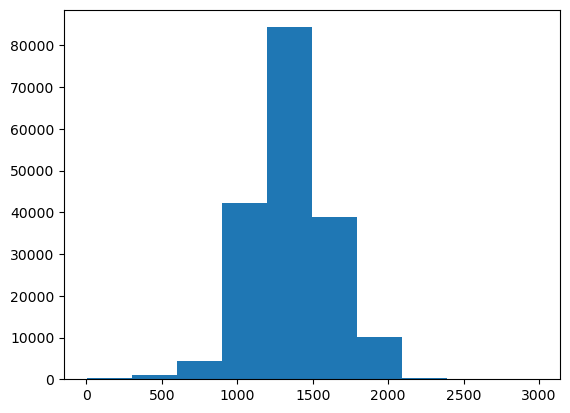

In [829]:
plt.hist(df['width'])
plt.show()

In [830]:
df['width'].describe()

count    181673.000000
mean       1295.286724
std         261.631754
min           1.000000
25%        1180.000000
50%        1250.000000
75%        1500.000000
max        2990.000000
Name: width, dtype: float64

In [831]:
df['width'].isna().sum()

0

In [832]:
df['width'].nunique()

1386

#### material_ref

In [833]:
df['material_ref']

0                                      DEQ1 S460MC
1         0000000000000000000000000000000000104991
2                                         S0380700
3                          DX51D+ZM310MAO 2.3X1317
4                                  2_S275JR+AR-CL1
                            ...                   
181668    0000000000000000000000000000000001000777
181669    0000000000000000000000000000000001000227
181670    0000000000000000000000000000000001004216
181671    0000000000000000000000000000000001001149
181672    0000000000000000000000000000000001005439
Name: material_ref, Length: 181673, dtype: object

In [834]:
df['material_ref'].isna().sum()

77919

In [835]:
print(f"{(df['material_ref'].isna().sum()/len(df) * 100):.2f}% of NaN values in material_ref")

42.89% of NaN values in material_ref


In [836]:
df['material_ref'].dtypes

dtype('O')

In [837]:
df['material_ref'].describe()

count      103754
unique      16563
top       DX51D+Z
freq          922
Name: material_ref, dtype: object

In [838]:
df['material_ref'].value_counts()

DX51D+Z                                     922
G9010                                       856
DC01 RED.FLAT KUCHNIA EKO 2.2               777
DC01                                        725
G9006                                       671
                                           ... 
0000000000000000000000000000000003050080      1
0000000000000000000000000000000004001568      1
0000000000000000000000000000000003016460      1
0000000000000000000000000000000003016459      1
202006170005.IO.1.1                           1
Name: material_ref, Length: 16563, dtype: int64

#### Most Probably will drop this material_ref

#### product_ref

In [839]:
df['product_ref']

0         1670798778
1         1668701718
2             628377
3         1668701718
4             640665
             ...    
181668     164141591
181669     164141591
181670     164141591
181671     164141591
181672     164141591
Name: product_ref, Length: 181673, dtype: int64

In [840]:
df['product_ref'].describe()

count    1.816730e+05
mean     4.739679e+08
std      7.175101e+08
min      6.117280e+05
25%      6.119930e+05
50%      6.406650e+05
75%      1.332077e+09
max      1.722208e+09
Name: product_ref, dtype: float64

In [841]:
df['product_ref'] = df['product_ref'].astype(int)

In [842]:
len(df['product_ref'].value_counts())

33

In [843]:
df['product_ref'].isna().sum()

0

In [844]:
df['product_ref']

0         1670798778
1         1668701718
2             628377
3         1668701718
4             640665
             ...    
181668     164141591
181669     164141591
181670     164141591
181671     164141591
181672     164141591
Name: product_ref, Length: 181673, dtype: int64

#### delivery date

In [845]:
df['delivery date']

0         20210701.0
1         20210401.0
2         20210101.0
3         20210101.0
4         20210301.0
             ...    
181668    20200701.0
181669    20200701.0
181670    20200701.0
181671    20200701.0
181672    20200701.0
Name: delivery date, Length: 181673, dtype: float64

In [846]:
df['delivery date'].isna().sum()

1

In [847]:
len(df['delivery date'].value_counts())

28

In [848]:
df['delivery date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 181673 entries, 0 to 181672
Series name: delivery date
Non-Null Count   Dtype  
--------------   -----  
181672 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [851]:
df['delivery date'].dtypes

dtype('float64')

In [854]:
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')

In [855]:
df['delivery date'].isna().sum()

3

In [856]:
df['delivery date'].fillna( method ='ffill', inplace = True)

In [857]:
df['delivery date'].dtypes

dtype('<M8[ns]')

#### selling_price

In [861]:
df['selling_price']

0          854.00
1         1047.00
2          644.33
3          768.00
4          577.00
           ...   
181668     591.00
181669     589.00
181670     619.00
181671     601.00
181672     607.00
Name: selling_price, Length: 181673, dtype: float64

In [862]:
df['selling_price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 181673 entries, 0 to 181672
Series name: selling_price
Non-Null Count   Dtype  
--------------   -----  
181672 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [863]:
df['selling_price'].describe()

count    1.816720e+05
mean     1.918036e+03
std      3.317956e+05
min     -1.160000e+03
25%      6.690000e+02
50%      8.120000e+02
75%      9.530000e+02
max      1.000010e+08
Name: selling_price, dtype: float64

In [877]:
df['selling_price'].fillna(df['selling_price'].median(), inplace = True)

#### Now we have to drop the columns

In [887]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938,25,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963,30,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [888]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [899]:
df2 = df.copy()

In [901]:
df2.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938,25,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963,30,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [902]:
df2.drop(['id','material_ref','product_ref'], axis=1, inplace=True)

In [903]:
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,delivery date,selling_price
0,2021-04-01,54.151139,30156308,28,Won,W,10.0,2.00,1500.0,2021-07-01,854.00
1,2021-04-01,768.024839,30202938,25,Won,W,41.0,0.80,1210.0,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963,30,Won,WI,28.0,0.38,952.0,2021-01-01,644.33
3,2021-04-01,202.411065,30349574,32,Won,S,59.0,2.30,1317.0,2021-01-01,768.00
4,2021-04-01,785.526262,30211560,28,Won,W,10.0,4.00,2000.0,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854,25,Won,W,41.0,0.96,1220.0,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854,25,Won,W,41.0,0.95,1500.0,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854,25,Won,W,41.0,0.71,1250.0,2020-07-01,619.00
181671,2020-07-02,30.365022,30200854,25,Won,W,41.0,0.85,1250.0,2020-07-01,601.00


In [905]:
df2.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                  int64
country                   int64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [906]:
df2.to_csv('./interm_daily_offers.csv')

#### We'll continue the rest in the TRAIN ipynb